# Introduction

Classification refers to methods used to predict the class (or category) of a given data point based upon its features. Classification models are commonly used to solve problems such as categorizing email as spam or not spam, or distinguishing between benign and malignant tumors (classes don't necessarily have to be binary). A simple way to determine whether a classification model is an appropriate choice for making predictions on a given dataset is to consider whether the target (dependent) variable is a 'categorical' variable (may also be refered to as a 'discrete' varaible).

This notebook provides Exploratory Data Analysis for the application of various classification models to a classification problem described here:

>Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.
>
>The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.
>
>While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!
>
>To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.
>
>Help save them and change history!

 Here's a description of the dataset:

 > PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
>
> HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
>
> CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
>
> Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
>
> Destination - The planet the passenger will be debarking to.
>
> Age - The age of the passenger.
>
> VIP - Whether the passenger has paid for special VIP service during the voyage.
>
> RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
>
> Name - The first and last names of the passenger.
>
> Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Source: Addison Howard, Ashley Chow, Ryan Holbrook. (2022). Spaceship Titanic. Kaggle. https://kaggle.com/competitions/spaceship-titanic

An important detail from the data description:

Features 'PassengerId', 'Name', and 'Cabin' are composite features -- i.e. they are comprised of multiple distinct attributes. Composite features should be disaggregated into their constituent components, otherwise important information may be obscured from analysis.

# Exploratory Data Analysis

In [139]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    RobustScaler,
    TargetEncoder,
)

In [141]:
df = pd.read_csv('./data/train.csv')

First, some summary statistics...

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [143]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [144]:
df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


Interpretation & Insights:

- The dataset has a mix of categorical and numeric features, each of which will require a different approach in preprocessing.

- There are relatively few missing values in the dataset, and they are fairly evenly distributed among features. Importanly, the 'PassengerId' column has no missing values. This could be an important starting place for estimating missing values in other columns; however, most passengers are traveling alone, so we'll probably have to rely on information from other attributes to fill missing values as well.

- A few of the features ('PassengerId', 'Cabin', 'Name') exhibit high cardinality -- i.e. they have a huge number of unique values. Dealing with high cardinality requires a thoughtful approach to preprocessing in order to avoid substantially increasing dimensionality in the dataset. High dimensionality makes determing which features are important extremely difficult for the model (the curse of dimensionality). High cardinality features will have to be appropriately encoded, proxied to a low cardinality feature, or dropped entirely.

Now let's plot feature distributions...

In [145]:
# known values only
df.dropna(inplace=True)

Before plotting, let's split those composite features...

In [146]:
# disaggregate composite columns (as stated above these contain important info and need to be parsed)
df[['GroupId', 'PersonId']] = df['PassengerId'].str.split('_', expand=True)
df[['FirstName', 'LastName']] = df['Name'].str.split(' ', n=1, expand=True)
df[['CabinDeck', 'CabinNumber', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)

# this feature can be cast as an integer for plotting purposes...
df['CabinNumber'] = df['CabinNumber'].map(lambda x: x if pd.isna(x) else int(x))

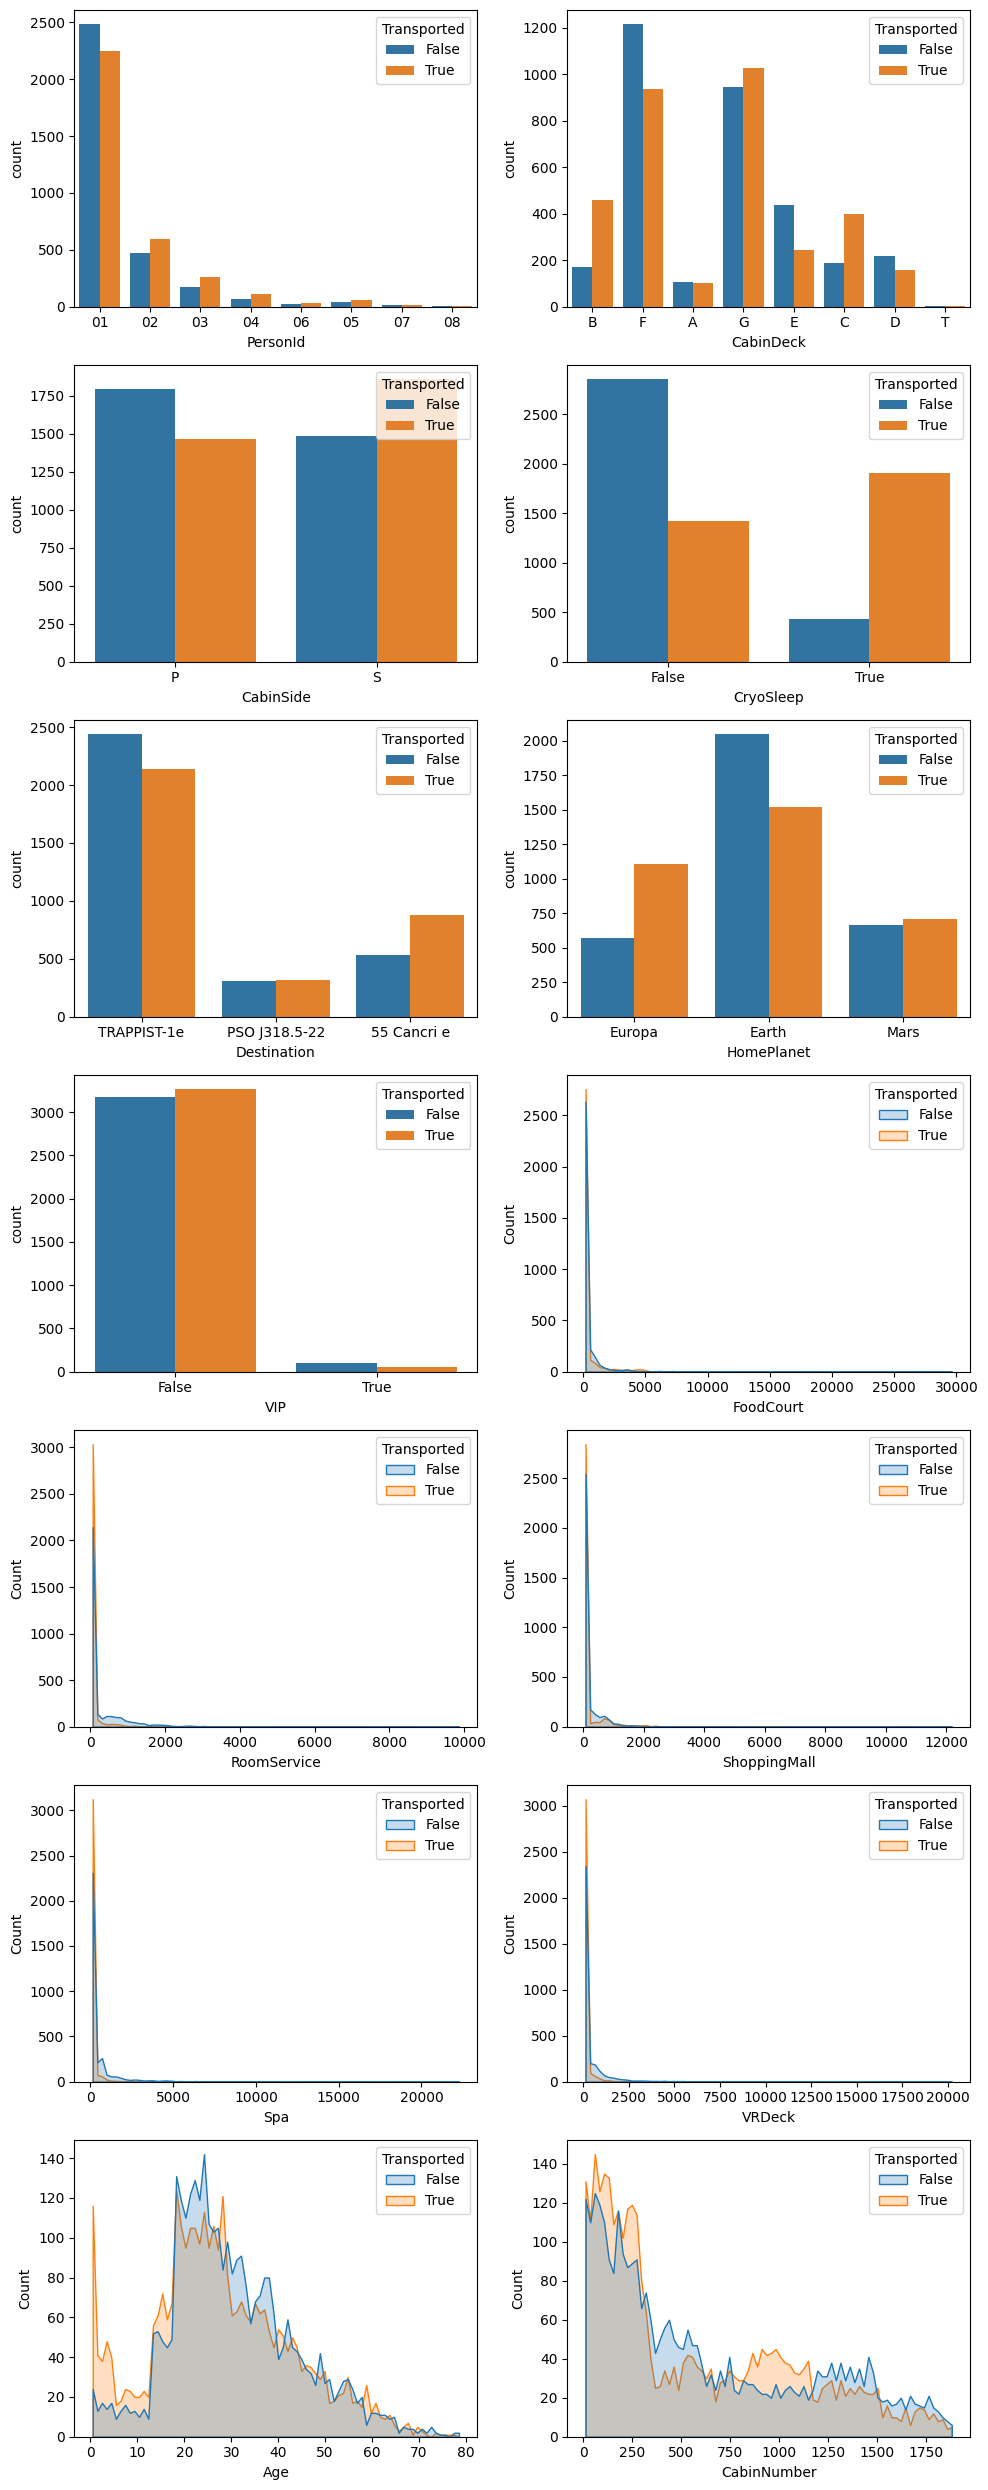

In [147]:
# all features to plot (not including high cardinality features)
features = [
    'PersonId',
    'CabinDeck',
    'CabinSide',
    'CryoSleep',
    'Destination',
    'HomePlanet',
    'VIP',
    'FoodCourt',
    'RoomService',
    'ShoppingMall',
    'Spa',
    'VRDeck',
    'Age',
    'CabinNumber',
]

# features to plot with histogram
as_histplot = [
    'Age',
    'CabinNumber',
    'FoodCourt',
    'RoomService',
    'ShoppingMall',
    'Spa',
    'VRDeck',
]

rows, cols = (7, 2)
fig, axes = plt.subplots(rows, cols, figsize=(10, 25))
ax = [(row, col) for row in range(rows) for col in range(cols)]
axes_features = list(zip(ax, features))
for ax, feat in axes_features:
    row, col = ax
    if feat in as_histplot:
        sns.histplot(df, x=feat, hue='Transported', bins=80, element="poly", ax=axes[row, col])
    else:
        sns.countplot(df, x=feat, hue='Transported', ax=axes[row, col])
plt.tight_layout()

Interpretation & Insights:

- For each of the 'amenities' features ('RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck'), the standard deviation is significantly larger than the mean. This suggests that the observations in these columns are widely distributed around the mean. Note also that the 75th percentile for each is significantly smaller than the mean. Considered together, we can infer that there are a significant number of very low values (lot's of zeros - see also 25th and 50th percentile statistics for each) and at least some high or very high values (outliers). This is much more apparent when evaluating the plots for each. 'Age' is more evenly distributed, but skews a bit younger. Features with abnormal distributions require special consideration for how they are treated in preprocessing.

- 'VIP' is a highly imbalanced feature. It's probably not a useful feature to the model and will likely be removed during feature selection.

- 'PersonId' indicates a passenger's number within a group. The distribution suggests most passengers are solo. The dimensions of this feature can be reduced by substituting it for a new feature (e.g. 'InGroup') that indicates whether a passenger belongs to a group.

- 'CabinNumber' indicates a cabin's location on a deck and side. It's an ordinal feature that exhibits high cardinality. As such, it poses a challenge for preprocessing. The above plot suggests certain ranges of cabins are informative of the target. This feature can be proxied by binning values into distinct groups to create a new feature (e.g. 'CabinLocation').

It would be helpful get a sense of what features are correlated with one another. One way to do this is by creating a correlation matrix. Because the dataset has a mix of categorical and numerical features, quantifying relationships among features is a bit tricky. For example, relationships between categorical features can be estimated using some measure of association; while relationships between numerical features can be estimated using some measure of correlation. However, neither of those measures is appropriate for both types of features. One way to approach this problem is to encode the categorical features as numerical features thereby enabling the application of a measure of correlation to quantify relationships between features. This method isn't perfect, but it should be good enough to make some useful generalizations about the data.

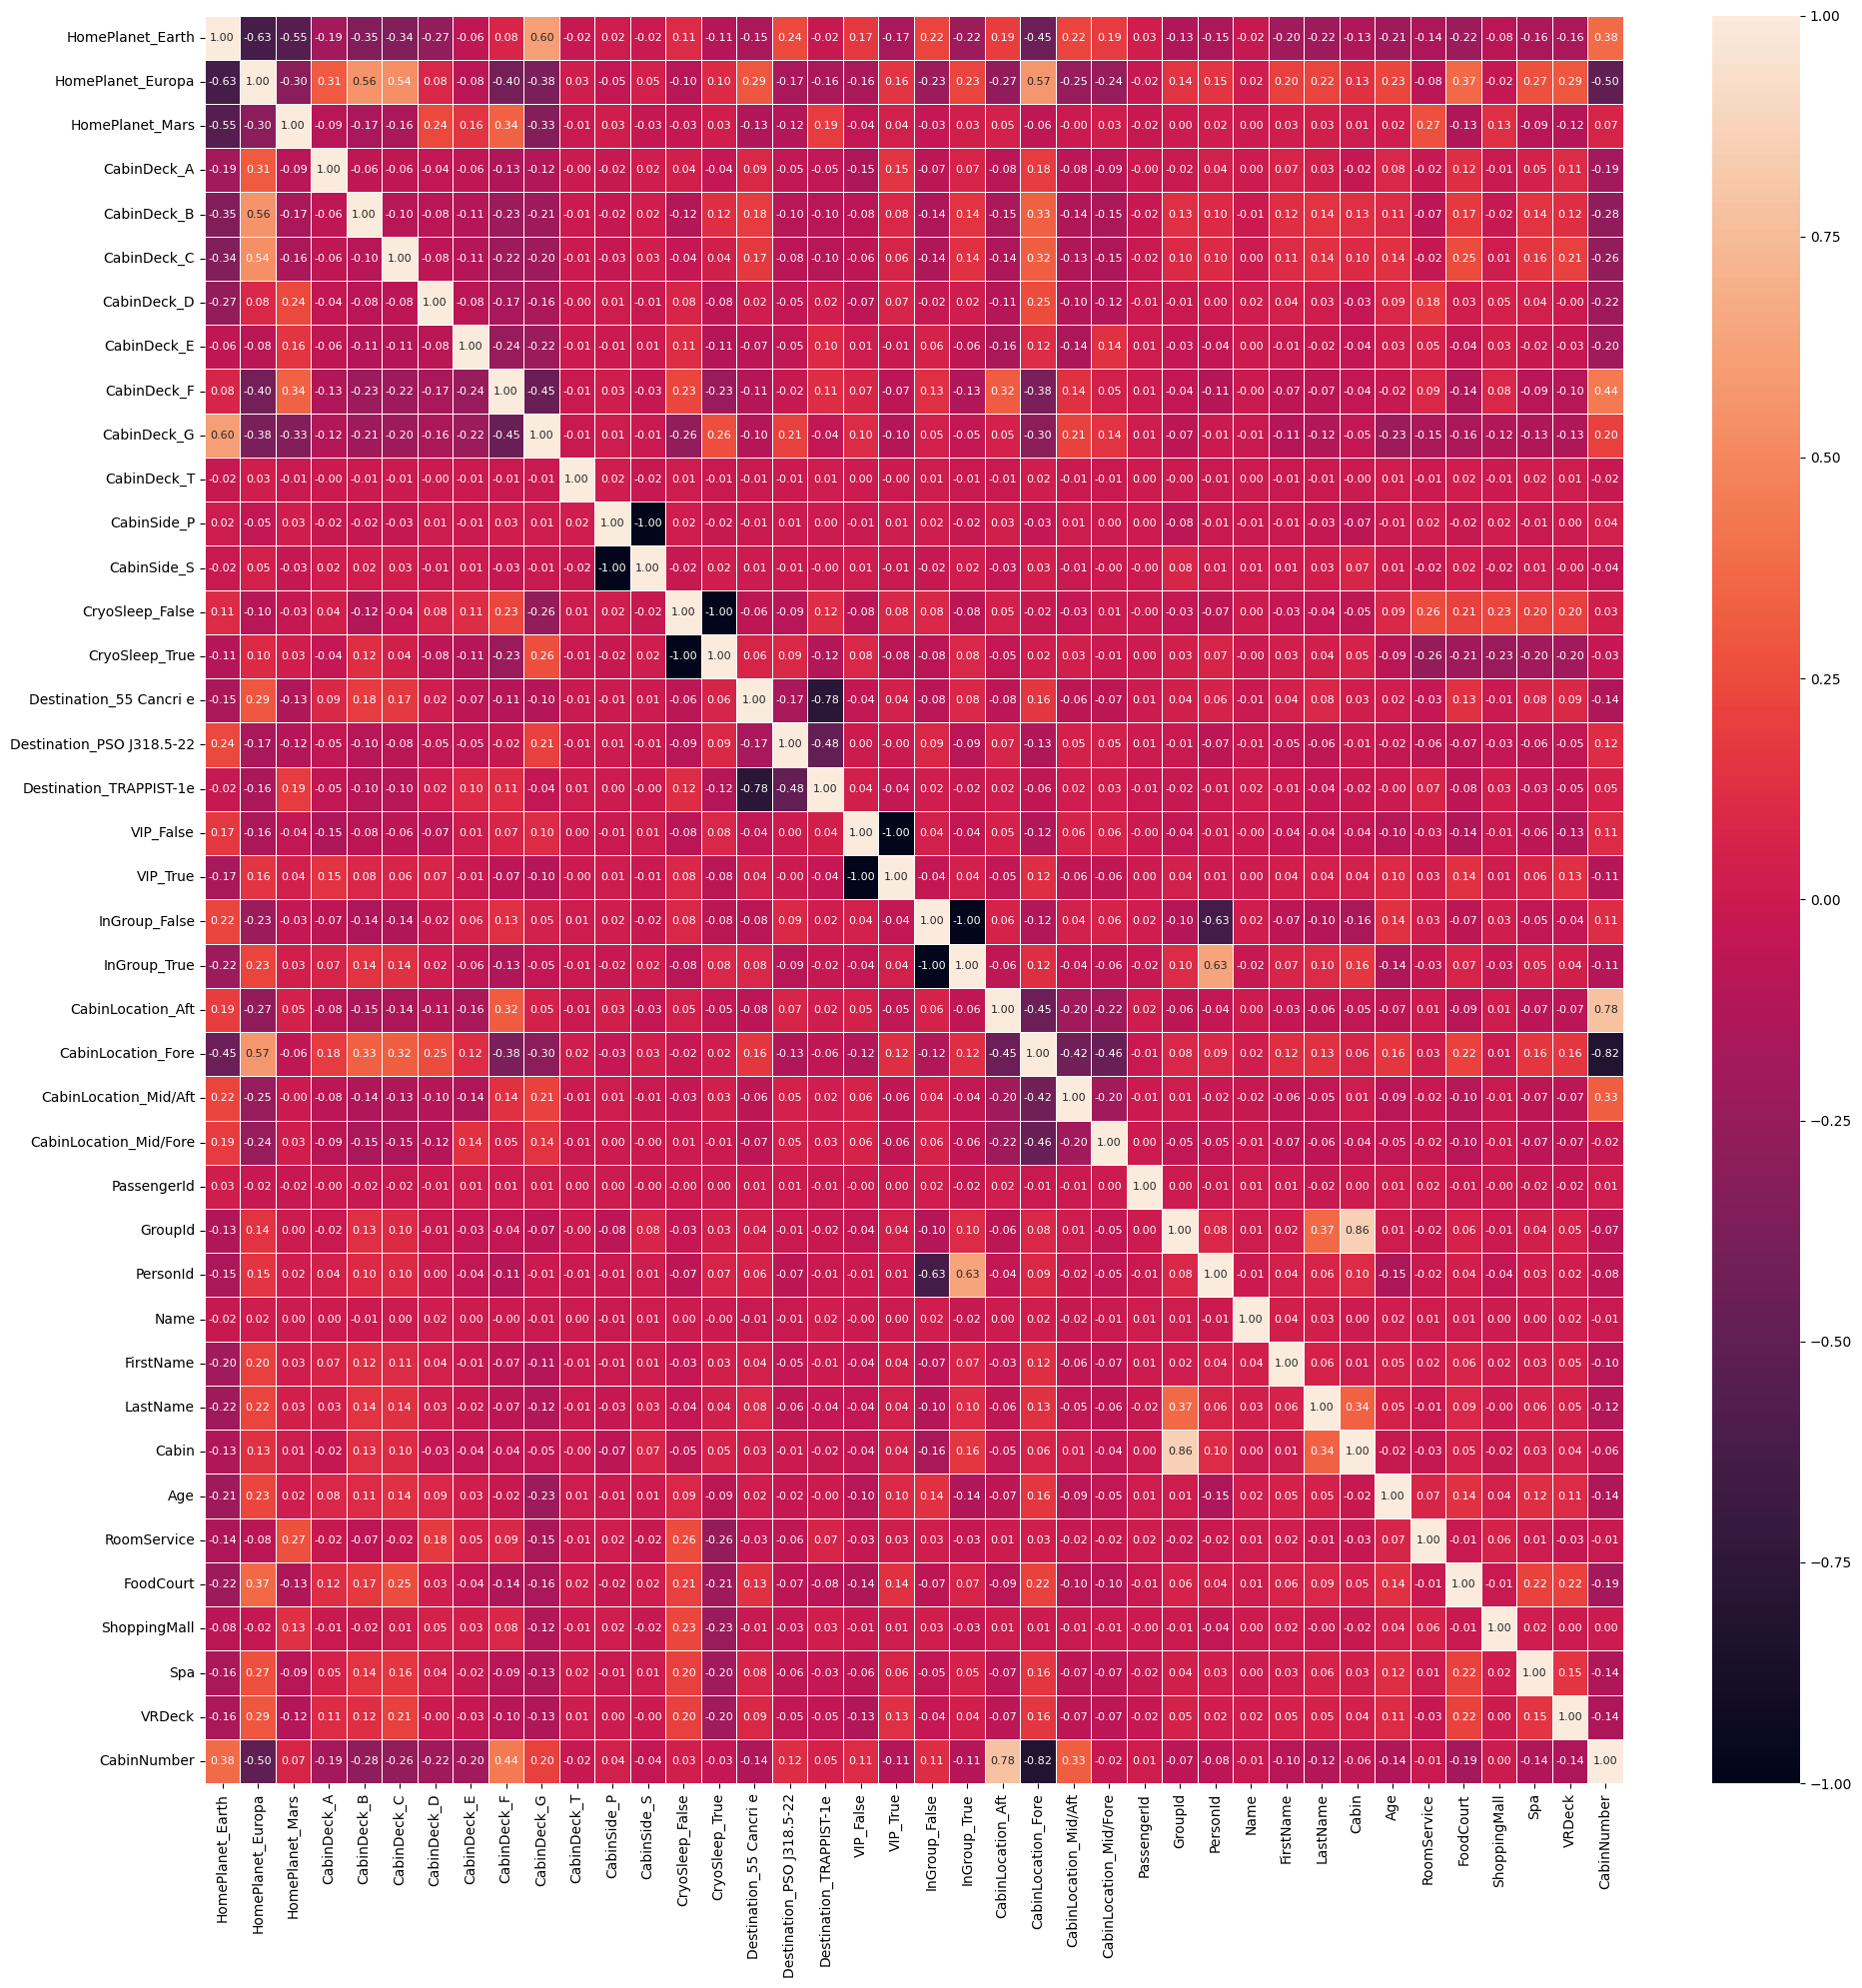

In [148]:
df['InGroup'] = df['GroupId'].duplicated(keep=False)

df['CabinLocation'] = df['CabinNumber'].map(
    lambda x: (
        'Fore' if x <= 400 else 'Mid/Fore' if x > 400 and x <= 800 else 'Mid/Aft' if x > 800 and x <= 1200 else 'Aft'
    ) if pd.notna(x) else x
)

# categorical features (excluding those exhibiting high cardinality - these will be one-hot encoded)
cat_features = [
    'HomePlanet', 
    'CabinDeck', 
    'CabinSide',
    'CryoSleep', 
    'Destination', 
    'VIP',
    'InGroup',
    'CabinLocation',
]

# categorical features (exhibiting high cardinality - these will be target encoded)
cat_hc_features = [
    'PassengerId',
    'GroupId',
    'PersonId',
    'Name',
    'FirstName', 
    'LastName', 
    'Cabin',
]

num_features = [
    'Age',
    'RoomService', 
    'FoodCourt', 
    'ShoppingMall', 
    'Spa', 
    'VRDeck',
    'CabinNumber',
]

features = [
    *cat_features, 
    *cat_hc_features, 
    *num_features
]

transformers = [
    ('encoder', OneHotEncoder(sparse_output=False), cat_features),
    ('encoder_hc', TargetEncoder(random_state=0), cat_hc_features),
    ('scaler', RobustScaler(), num_features),
]

ct = ColumnTransformer(
    transformers=transformers, 
    remainder='passthrough',
    verbose_feature_names_out=False,
)
ct.set_output(transform='pandas')

X = df[features]
y = df['Transported']

X = ct.fit_transform(X, y)

# correlation matrix / heatmap
corrs = X.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrs, fmt='.2f', linewidths=.5, annot=True, annot_kws={"fontsize":8})
plt.tight_layout()
plt.show()

The correlation matrix provides a good starting place for understanding whether and (to some extent) how features are correlated. Let's explore these relationships between features to see if they can be further defined...

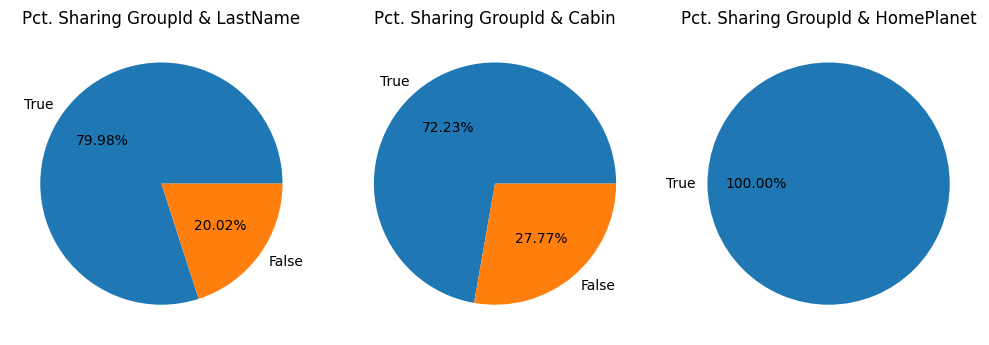

In [149]:
# identify passengers who are traveling in a group
sharedgroup_idx = df[df['GroupId'].duplicated(keep=False) == True].index

plt.figure(figsize=(10, 5))

plot_kwargs = {
    'autopct': "%.2f%%",
    'ylabel': ''
}

plt.subplot(131)
plot_kwargs['title'] = "Pct. Sharing GroupId & LastName"
(df[df.index.isin(sharedgroup_idx)].groupby(['GroupId'])['LastName'].nunique() == 1).value_counts().plot.pie(**plot_kwargs)

plt.subplot(132)
plot_kwargs['title'] = "Pct. Sharing GroupId & Cabin"
(df[df.index.isin(sharedgroup_idx)].groupby(['GroupId'])['Cabin'].nunique() == 1).value_counts().plot.pie(**plot_kwargs)

plt.subplot(133)
plot_kwargs['title'] = "Pct. Sharing GroupId & HomePlanet"
(df[df.index.isin(sharedgroup_idx)].groupby(['GroupId'])['HomePlanet'].nunique() == 1).value_counts().plot.pie(**plot_kwargs)

plt.tight_layout()

Interpretation & Insights:

- Passengers sharing a group id always come from the same home planet. 

- They often also share the same last name and cabin. 

- 'GroupId' can be useful in imputing missing values for each of these features.

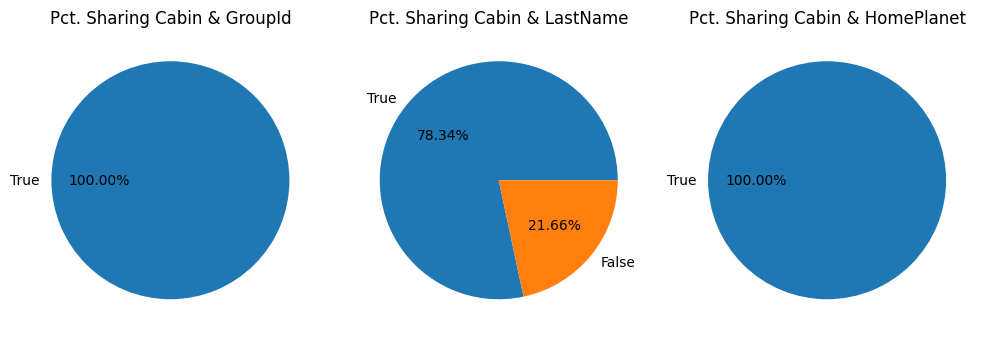

In [150]:
# identify passengers who share a cabin
sharedcabin_idx = df[df['Cabin'].duplicated(keep=False) == True].index

plt.figure(figsize=(10, 5))

plot_kwargs = {
    'autopct': "%.2f%%",
    'ylabel': '',
}

plt.subplot(131)
plot_kwargs['title'] = 'Pct. Sharing Cabin & GroupId'
(df[df.index.isin(sharedcabin_idx)].groupby(['Cabin'])['GroupId'].nunique() == 1).value_counts().plot.pie(**plot_kwargs)

plt.subplot(132)
plot_kwargs['title'] = 'Pct. Sharing Cabin & LastName'
(df[df.index.isin(sharedcabin_idx)].groupby(['Cabin'])['LastName'].nunique() == 1).value_counts().plot.pie(**plot_kwargs)

plt.subplot(133)
plot_kwargs['title'] = "Pct. Sharing Cabin & HomePlanet"
(df[df.index.isin(sharedcabin_idx)].groupby(['Cabin'])['HomePlanet'].nunique() == 1).value_counts().plot.pie(**plot_kwargs)

plt.tight_layout()

Interpretation & Insights:

- Passengers who share a cabin often share a last name.

- Passengers sharing a cabin always share a home planet. 

- A shared 'Cabin' is good predictor of both 'LastName' and 'HomePlanet'.

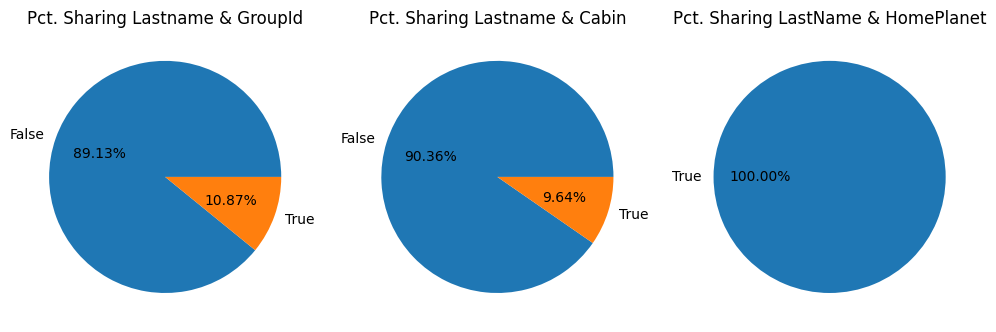

In [151]:
# identify passengers who share a last name
sharedlastname_idx = df[df['LastName'].duplicated(keep=False) == True].index

plt.figure(figsize=(10, 5))

plot_kwargs = {
    'autopct': "%.2f%%",
    'ylabel': '',
}

plt.subplot(131)
plot_kwargs['title'] = "Pct. Sharing Lastname & GroupId"
(df[df.index.isin(sharedlastname_idx)].groupby(['LastName'])['GroupId'].nunique() == 1).value_counts().plot.pie(**plot_kwargs)

plt.subplot(132)
plot_kwargs['title'] = "Pct. Sharing Lastname & Cabin"
(df[df.index.isin(sharedlastname_idx)].groupby(['LastName'])['Cabin'].nunique() == 1).value_counts().plot.pie(**plot_kwargs)

plt.subplot(133)
plot_kwargs['title'] = "Pct. Sharing LastName & HomePlanet"
(df[df.index.isin(sharedlastname_idx)].groupby(['LastName'])['HomePlanet'].nunique() == 1).value_counts().plot.pie(**plot_kwargs)

plt.tight_layout()

Interpretation & Insights:

- Passengers sharing a last name always come from the same home planet.

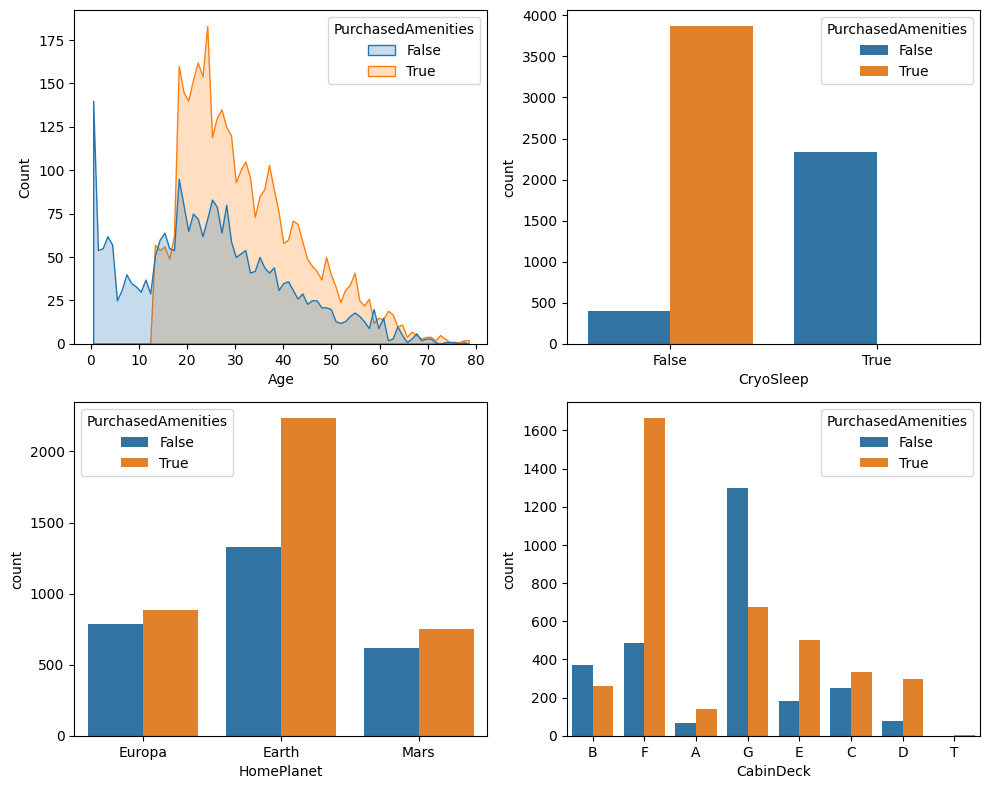

In [152]:
# amenities

df['PurchasedAmenities'] = (df['FoodCourt'] + df['RoomService'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck'])  > 0

plt.figure(figsize=(10, 8))

plt.subplot(221)
sns.histplot(df, x='Age', hue='PurchasedAmenities', element='poly', bins=80)

plt.subplot(222)
sns.countplot(df, x='CryoSleep', hue='PurchasedAmenities')

plt.subplot(223)
sns.countplot(df, x='HomePlanet', hue='PurchasedAmenities')

plt.subplot(224)
sns.countplot(df, x='CabinDeck', hue='PurchasedAmenities')

plt.tight_layout()

Interpretation & Insights:

- Passengers the age of roughly 12 years old and younger did not purchase amenities. This insight is very useful.

- Passengers in cryosleep did not purchase amenities and passengers who purchased amenities were not in cryosleep. Those who were not in cryosleep did not 
necessarily purchase amenities. This could have to do with their age since we know passengers 12 years old and  younger did not purchase amenities. Again, a very important insight.

- All passengers were more likely to have purchased amenities than not regardless of their home planet. 'HomePlanet' is not really useful in predicting a passenger's purchasing behavior.

- Those assigned cabin deck "G" were least likely to have purhcased amenities. This might be useful, but cryosleep status seems like a stronger predictor of purchasing behavior.

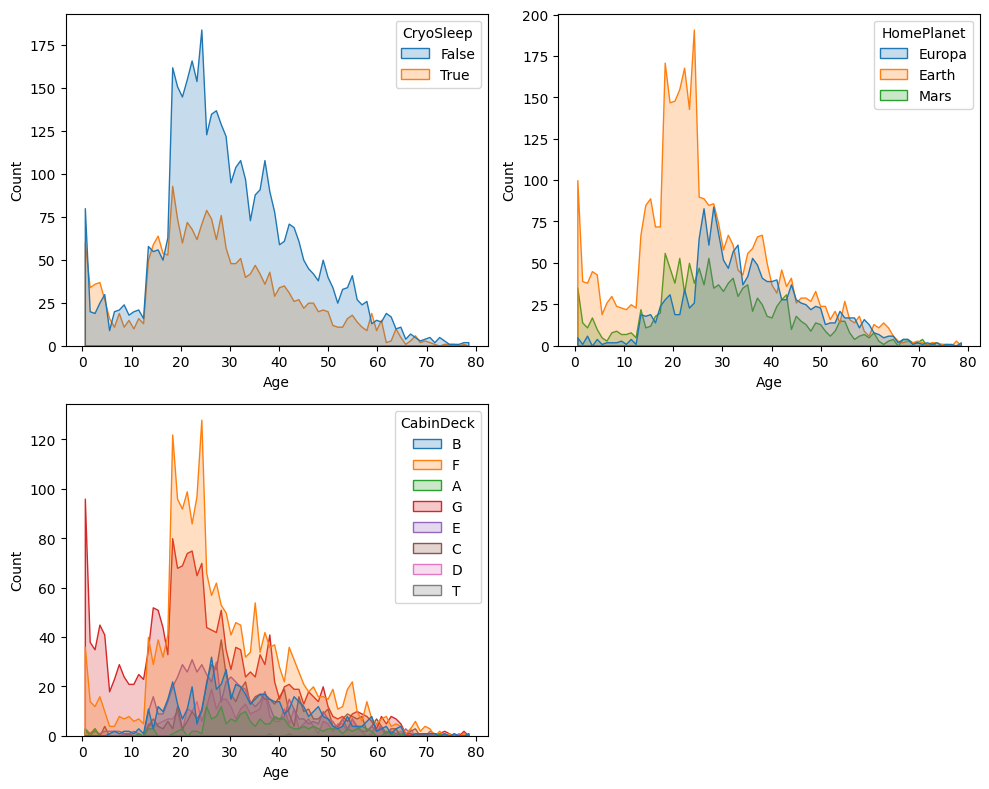

In [153]:
# Age

plt.figure(figsize=(10, 8))

plt.subplot(221)
sns.histplot(df, x='Age', hue='CryoSleep', element='poly', bins=80)

plt.subplot(222)
sns.histplot(df, x='Age', hue='HomePlanet', element='poly', bins=80)

plt.subplot(223)
sns.histplot(df, x='Age', hue='CabinDeck', element='poly', bins=80)

plt.tight_layout()

Interpretation & Insights:

- Passengers under 18 years old are more likely overall to have been in 'CryoSleep'.

- Comparing the 'Age' / 'CryoSleep' plot with the 'Age' / 'PurchasedAmenities' plot, it seems reasonable to guess that if a an adult passenger (18+ years old) did not purchase amenitities, they must have been in cryosleep. I've re-plotted these two side-by-side below for reference. This is an important insight.

- Passengers of about 25 years old and younger most likely come from Earth. This is especially true for passengers 12 years old and younger. Over the age of 25, passengers are more likely to come from Europa or Mars than they are to come from Earth. This might be a useful insight, but there are stronger predictors of a passenger's home planet than 'Age'.

- As we can see in the distribution plots above, most passengers are assigned to cabin deck "F" or "G"; but most passengers 12 years old and younger are considerably more likely to be assigned to cabin deck "G". The underlying reason for this is likely the correlation between 'CabinDeck' and 'HomePlanet'. Again, this could be a useful insight, but there are stronger predictors of passenger's cabin deck than 'Age'.

Here are the 'Age' / 'PurchasedAmenities' and 'Age' / 'CryoSleep' plots side-by-side:

<Axes: xlabel='Age', ylabel='Count'>

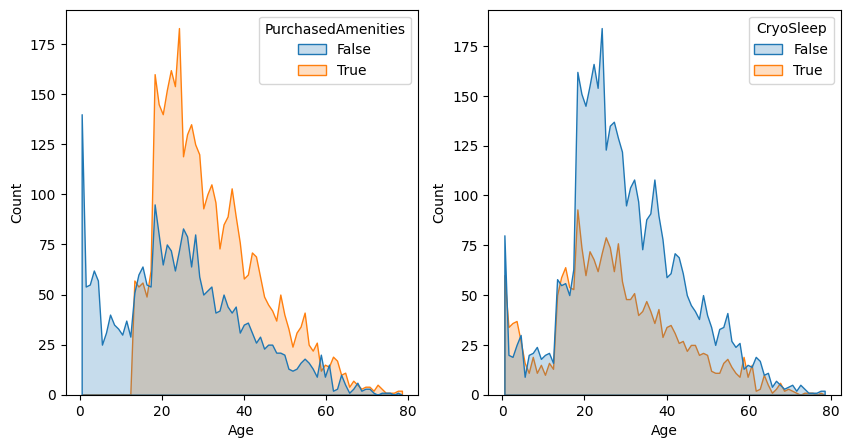

In [154]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
sns.histplot(df, x='Age', hue='PurchasedAmenities', element='poly', bins=80)

plt.subplot(122)
sns.histplot(df, x='Age', hue='CryoSleep', element='poly', bins=80)

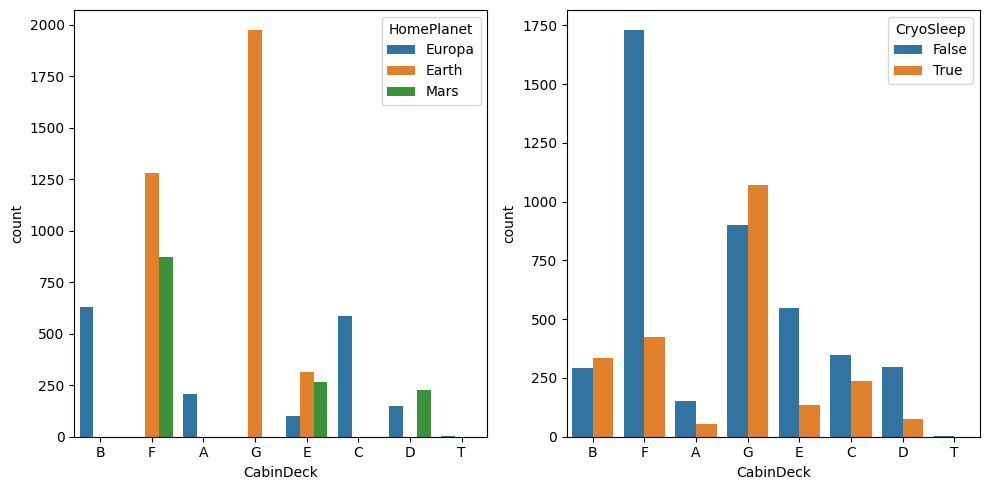

In [155]:
# CabinDeck
plt.figure(figsize=(10, 5))

plt.subplot(121)
sns.countplot(df, x='CabinDeck', hue='HomePlanet')

plt.subplot(122)
sns.countplot(df, x='CabinDeck', hue='CryoSleep')

plt.tight_layout()

Interpretation & Insights:

- Passengers assigned to cabin decks "A", "B", "C", and "T" come exclusively from Europa; and passengers assigned to cabin deck "G" come exclusively from "Earth". This explains a lot of correlation between 'HomePlanet' and 'CabinDeck'. A very useful insight.

- The likelihood that a passenger is in cryosleep varies by cabin deck. Considering what we know about the relationship between 'CabinDeck' and 'HomePlanet', it seems reasonable to guess that if a passenger from Earth is in cryosleep, they are most likely assigned cabin deck "G", and if they are not, they are most likely assigned cabin deck "F" (but not by a substantial margin). It happens that "G" is the most common 'CabinDeck' value for passengers from Earth. It's probably safe to assume that for missing 'CabinDeck' values, we can impute the mode by 'HomePlanet'. It's not perfect, but it's far better than imputing the mode for all cabin decks. This should be done *after* filling missing values for 'HomePlanet'.

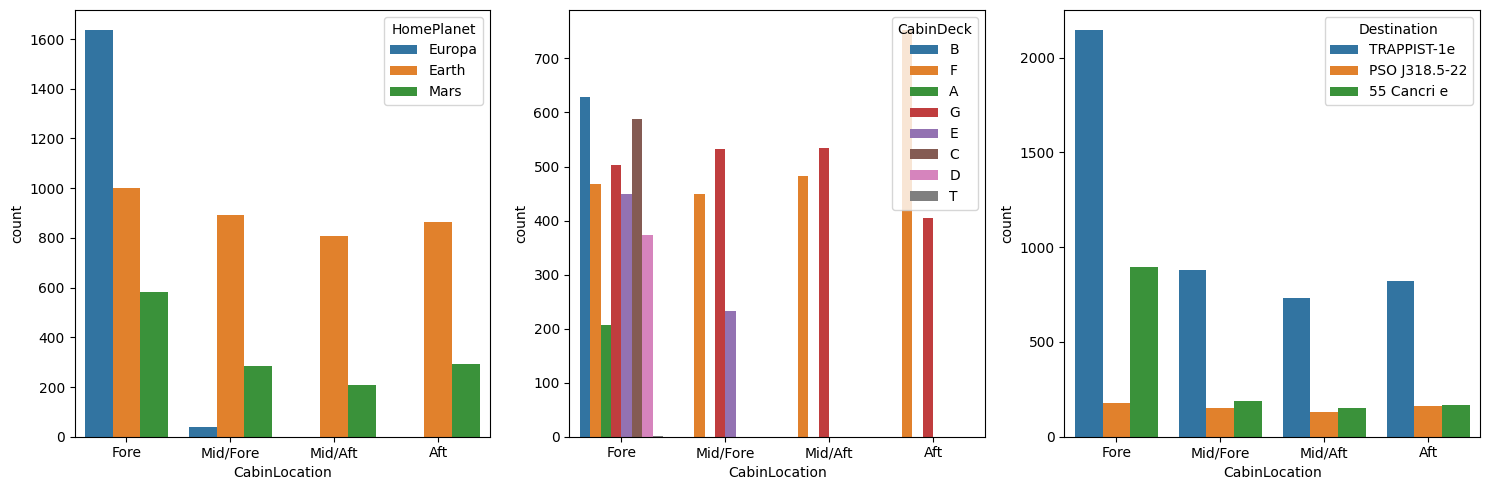

In [156]:
# CabinNumber
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.countplot(df, x='CabinLocation', hue='HomePlanet')

plt.subplot(132)
sns.countplot(df, x='CabinLocation', hue='CabinDeck')

plt.subplot(133)
sns.countplot(df, x='CabinLocation', hue='Destination')

plt.tight_layout()

Interpretation & Insights: 

- Cabins holding passengers from Europa are almost certainly located at the "Fore" of the ship. Cabins not located at the "Fore" of the ship most likely hold passengers from Earth.

- Cabins on decks "A", "B", and "C" are most likely located at the "Fore" of the ship. This shouldn't be surprising since we know that passengers assigned to those decks are exclusively from "Europa".

- Passengers with a 'Destination' of "55 Cancri e" are much more likely to be assigned to 'CabinLocation' "Fore".

<Axes: xlabel='Destination', ylabel='count'>

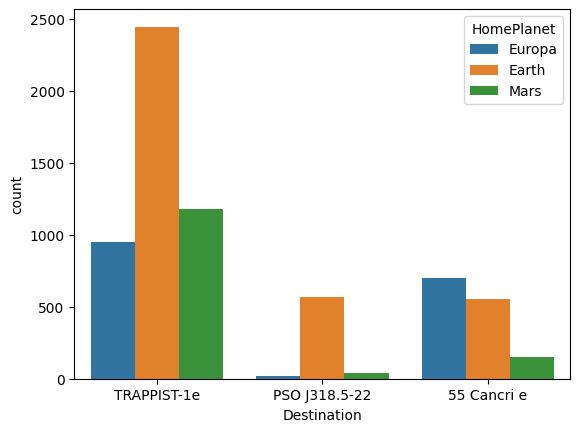

In [157]:
# Destination
sns.countplot(df, x='Destination', hue='HomePlanet')

Interpretation & Insights:

- Passengers traveling to "PSO J318.55-22" almost always from Earth.

Exploring feature correlations and distributions has provided several useful rules and generalizations that can serve as the foundation of a strategy for filling missing values. Missing values are filled according to the above insights in the `preprocessing.ipynb` notebook.